In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from numpy import sqrt,log
from scipy.stats import boxcox
import statsmodels.formula.api as smf 
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf 
import warnings
%matplotlib inline

In [ ]:
#loading dataset
co2 = pd.read_excel("\\Users\\piyus\\Documents\\ExcelR project\\P90\\CO2 dataset.xlsx")
co2.head()

,Year,CO2
0,1800.0,0.00568
1,1801.0,0.00561
2,1802.0,0.00555
3,1803.0,0.00548
4,1804.0,0.00542


In [ ]:
#size of dataset
co2.shape

(215, 2)

In [ ]:
#data distribution
co2.CO2.describe()

count    215.000000
mean       6.741970
std        6.522437
min        0.001750
25%        0.041050
50%        6.390000
75%       11.500000
max       18.200000
Name: CO2, dtype: float64

In [ ]:
#checking for NAN values
co2.isna().sum()

Year    0
CO2     0
dtype: int64

In [ ]:
#data types
co2.dtypes

Year    float64
CO2     float64
dtype: object

In [ ]:
#checking for time intervals
x=co2.Year.diff()
for i in  x:
    if i == 1:
        pass
    else:
        print(i)

nan


In [ ]:
data=co2.copy()

#### converting the float to datetime format

In [ ]:
Year = pd.date_range(start="1/1/1800",end="1/1/2015",freq='A')
Year

DatetimeIndex(['1800-12-31', '1801-12-31', '1802-12-31', '1803-12-31',
               '1804-12-31', '1805-12-31', '1806-12-31', '1807-12-31',
               '1808-12-31', '1809-12-31',
               ...
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31'],
              dtype='datetime64[ns]', length=215, freq='A-DEC')

In [ ]:
data=data.drop(['Year'],axis=1)
data['Year'] =Year
#data['Year'] = pd.to_datetime(data['Year'], format='%Y')
#
#data=data.drop(['Year'],axis=1)
data.set_index(data.Year,inplace=True)
#data=data.drop(['Year'],axis=1)
data=data.iloc[:,0:1]
data.head()

,CO2
Year,
1800-12-31,0.00568
1801-12-31,0.00561
1802-12-31,0.00555
1803-12-31,0.00548
1804-12-31,0.00542


In [ ]:
data.dtypes

CO2    float64
dtype: object

### Analysing Data With Graphs

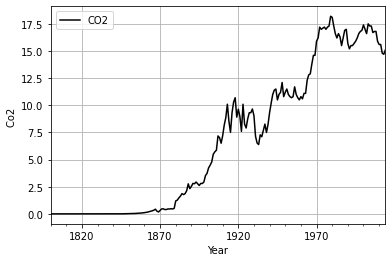

In [ ]:
#line plot
data.plot(color='black')
plt.xlabel("Year")
plt.ylabel("Co2 ")
plt.grid()
plt.show()

  **from above lineplot shows that C02 emission over the period of time is increasing therefore data is showing exponential trend but no seasonality is present in data.

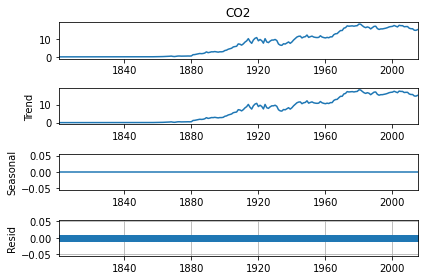

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(data.CO2)
decompose.plot()
plt.grid()
plt.show()

**Seasonal demoposition shows that 
 1. avarage is not constant for the co2 emission over the period of time
 2. there is a tred followed by data which is of exponential type 
 3. seasonality is not present in the data
 4. there are no residuals

<AxesSubplot:ylabel='Density'>

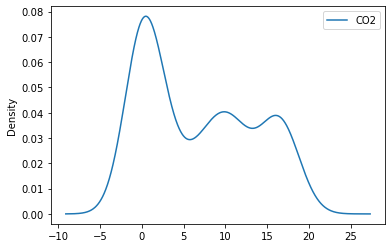

In [ ]:
data.plot(kind='kde')

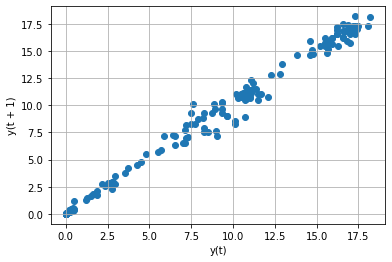

In [ ]:
#lag plot
from pandas.plotting import lag_plot
lag_plot(data,)
plt.grid()
plt.show()

**lag plots shows that there is positive liner relation between variable and its own lag variable 

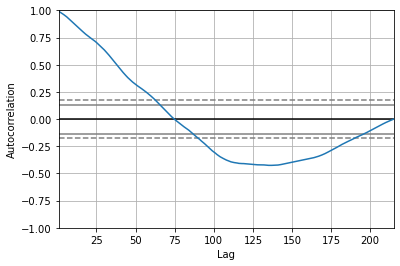

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data)
plt.show()

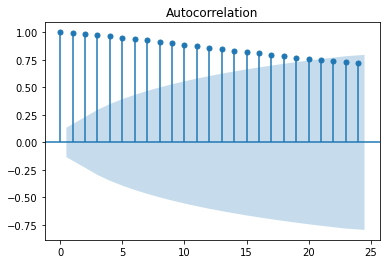

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.CO2)
plt.show()

**from the above graph we can examine that nearest time lag has good autocorrelation but as we reach time      period which are far away the autocorrelation is decressing

Modifing the data 
* including columns : "t"-time,"t_square"-time square,"log_co2"-log of Co2

In [ ]:
data_1=data.copy()
data_1["t"] = np.arange(1,216)
data_1["t_squared"] = data_1["t"]*data_1["t"]
data_1["log_CO2"] = np.log(data["CO2"])
data_2=data_1.drop(['CO2'],axis=1)
data_3=data_2.drop(['log_CO2'],axis=1)
data_1.head()


,CO2,t,t_squared,log_CO2
Year,,,,
1800-12-31,0.00568,1,1,-5.170804
1801-12-31,0.00561,2,4,-5.183205
1802-12-31,0.00555,3,9,-5.193957
1803-12-31,0.00548,4,16,-5.206650
1804-12-31,0.00542,5,25,-5.217659


### splitting modified data into training and testing

In [ ]:
train_1=data_1.head(172)
test_1=data_1.tail(43)

In [ ]:
test_1.shape

(43, 4)

#### square_root transformation

In [ ]:
## square_root transformation

sqrt_ = pd.DataFrame()
sqrt_['CO2'] = sqrt(data['CO2'])

sqrt_=pd.concat([sqrt_,data_3],axis=1)
sqrt_["log_CO2"]=np.log(sqrt_["CO2"])
train_sqrt_=sqrt_.head(172)
test_sqrt_=sqrt_.tail(43)

def inverse_sqrt(datat__):
    inv_sqrt = datat__*datat__
    return inv_sqrt

#### log transformation

In [ ]:


Log_ = pd.DataFrame()
Log_['CO2'] = log(data['CO2'])
Log_.head()
Log_=pd.concat([Log_,data_3],axis=1)
Log_["log_CO2"]=np.log(Log_["CO2"])
train_Log_=Log_.head(172)
test_Log_=Log_.tail(43)

def inverse_log(log_data):
    in_log=np.exp(log_data)
    print(in_log)

C:\Users\piyus\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


#### boxcox Transformation

In [ ]:


from scipy.stats import boxcox
from math import exp
# box-cox transform
result, lmbda = boxcox(data['CO2'])
boxcox_ = pd.DataFrame(result, columns=['CO2'])

boxcox_["t"]=np.arange(1,216)

boxcox_["t_squared"]=boxcox_["t"]*boxcox_["t"]
boxcox_["log_CO2"]=np.log(boxcox_['CO2'] )
boxcox_['log_CO2']=boxcox_['log_CO2'].fillna(0)

train_boxcox_=boxcox_.head(172)
test_boxcox_=boxcox_.tail(43)
#invert difference
def invert_boxcox(value, lam):
    if lam == 0:
        return exp(value)
    return exp(log(lam * value + 1) / lam)

#### resreciprocal transformation

In [ ]:


rec=np.reciprocal(data.CO2)
recipro=pd.DataFrame(rec,columns=['CO2'])
recipro=pd.concat([recipro,data_3],axis=1)
recipro['log_CO2']=np.log(recipro['CO2'])
train_recipro=recipro.head(172)
test_recipro=recipro.tail(43)

In [ ]:
#spliting the original data into training and testing set
train=data.head(172)
test=data.tail(43)

## Function to build model on "Naives Aproch ", " Simple Average "," Moving Average "

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


def errors1 (train,test):
    moddel= {
        'Naives Aproch' : {
            'model' : np.asarray(train.CO2)[len(np.asarray(train.CO2))-1]
        
    },
        'Simple Average' : {
            
            'model' : train['CO2'].mean()
        },
        'Moving Average' :{
            'model' : train['CO2'].rolling(2).mean().iloc[-1]
        }
        
}
    scores = []
    for moddel_name, config in moddel.items():
        gs =  config['model']
        scores.append({
            'model': moddel_name,
            'result':  np.mean(np.abs((gs-test.CO2)/test.CO2)*100)

        })
   
    return pd.DataFrame(scores,columns=['model','result'])


    

### putting the result into singal dataframe.


In [ ]:

result_driven = pd.DataFrame()
a_=errors1(train,test)
a=a_.rename(columns={'result':'original_error'},inplace=True)
b_=errors1(train_sqrt_,test_sqrt_)
b=b_.rename(columns={'result':'sqrt_error'},inplace=True)
c_=errors1(train_Log_,test_Log_)
c=c_.rename(columns={'result':'log_error'},inplace=True)
d_=errors1(train_boxcox_,test_boxcox_)
d=d_.rename(columns={'result':'BoxCox_error'},inplace=True)
#e_=errors1(train_Scaler_,test_Scaler_)
#e=e_.rename(columns={'result':'MinMax_error'},inplace=True)
f_=errors1(train_recipro,test_recipro)
f=f_.rename(columns={'result':'recipro_error'},inplace=True)
result_driven = pd.concat([a_,b_.drop(['model'],axis=1),c_.drop(['model'],axis=1),d_.drop(['model'],axis=1),f_.drop(['model'],axis=1)],axis=1)
result_driven

,model,original_error,sqrt_error,log_error,BoxCox_error,recipro_error
0,Naives Aproch,4.649507,2.337979,1.675075,2.237067,4.766006
1,Simple Average,73.892246,61.732583,131.961075,96.683402,137792.336173
2,Moving Average,4.972519,2.510991,1.802127,2.403927,5.183939


## Function to build model on "Simple Exponential ", " Holts ".

In [ ]:
def errors2 (train,test):
    mooodel={
        "Simple Exponential" :{
            'model': SimpleExpSmoothing(np.asarray(train['CO2'])).fit(smoothing_level=0.9)
        },
        "Holts" :{
            'model':Holt(np.asarray(train['CO2'])).fit(smoothing_level = 0.1,smoothing_slope = 0.1)
        }
    }
    
    scores = []
    for moddel_name, config in mooodel.items():
        gs =  config['model']
        pred = gs.forecast(len(test))
        scores.append({
            'model': moddel_name,
            'result':  np.mean(np.abs((pred-test.CO2)/test.CO2)*100)

        })
   
    return pd.DataFrame(scores,columns=['model','result'])


In [ ]:
#putting result into single data frame
warnings.filterwarnings("ignore")
result_exp = pd.DataFrame()
x_=errors2(train,test)
x=x_.rename(columns={'result':'original_error'},inplace=True)
y_=errors2(train_sqrt_,test_sqrt_)
y=y_.rename(columns={'result':'sqrt_error'},inplace=True)
z_=errors2(train_Log_,test_Log_)
z=z_.rename(columns={'result':'log_error'},inplace=True)
v_=errors2(train_boxcox_,test_boxcox_)
v=v_.rename(columns={'result':'BoxCox_error'},inplace=True)
#u_=errors2(train_Scaler_,test_Scaler_)
#u=u_.rename(columns={'result':'MinMax_error'},inplace=True)
nx_=errors2(train_recipro,test_recipro)
nx=nx_.rename(columns={'result':'recipro_error'},inplace=True)
result_exp = pd.concat([x_,y_.drop(['model'],axis=1),z_.drop(['model'],axis=1),v_.drop(['model'],axis=1),nx_.drop(['model'],axis=1)],axis=1)
result_exp

,model,original_error,sqrt_error,log_error,BoxCox_error,recipro_error
0,Simple Exponential,4.742296,2.388077,1.712167,2.285605,4.890105
1,Holts,18.766422,11.252373,10.030858,12.181049,2788.654244


## Function to build model on "Simple Liner model ", " Exponential Linear model ".

In [ ]:
def errors3 (train,test):
    mooodel={
        "Simple Liner model" :{
            'model': smf.ols('CO2~t',data=train).fit()
        },
        "Exponential Linear model" :{
            'model': smf.ols('log_CO2~t',data=train).fit()
        }
    }
    scores = []
    for moddel_name, config in mooodel.items():
        gs =  config['model']
        pred = pd.Series(gs.predict(test["t"]))
        scores.append({
            'model': moddel_name,
            'result':  np.mean(np.abs((pred-test.CO2)/test.CO2)*100)
        })
    return pd.DataFrame(scores,columns=['model','result'])

In [ ]:
##putting data into single dataframe
result_linear = pd.DataFrame()
k_=errors3(train_1,test_1)
k=k_.rename(columns={'result':'original_error'},inplace=True)
l_=errors3(train_sqrt_,test_sqrt_)
l=l_.rename(columns={'result':'sqrt_error'},inplace=True)
m_=errors3(train_Log_,test_Log_)
m=m_.rename(columns={'result':'log_error'},inplace=True)
t_=errors3(train_boxcox_,test_boxcox_)
t=t_.rename(columns={'result':'BoxCox_error'},inplace=True)
nc_=errors3(train_recipro,test_recipro)
nc=nc_.rename(columns={'result':'recipro_error'},inplace=True)
result_linear = pd.concat([k_,l_.drop(['model'],axis=1),m_.drop(['model'],axis=1),t_.drop(['model'],axis=1),nc_.drop(['model'],axis=1)],axis=1)
result_linear

,model,original_error,sqrt_error,log_error,BoxCox_error,recipro_error
0,Simple Liner model,16.483920,10.795550,108.404518,46.136285,204300.419266
1,Exponential Linear model,64.469798,28.047605,42.807310,63.323979,9700.050232


## Function to build model on "holts winter method"

In [ ]:
def holtserrors (train,test):
    mooodel={
        "Holts Winter" :{
            'model': ExponentialSmoothing(train.CO2).fit()
        }
    }
    
    scores = []
    for moddel_name, config in mooodel.items():
        gs =  config['model']
        pred = gs.forecast(len(test))
        scores.append({
            'model': moddel_name,
            'result':  np.mean(np.abs((pred-test.CO2)/test.CO2)*100)

        })
   
    return pd.DataFrame(scores,columns=['model','result'])


In [ ]:
warnings.filterwarnings("ignore")
holts_k_=holtserrors(train_1,test_1)
holts_k=holts_k_.rename(columns={'result':'original_error'},inplace=True)
holts_l_=holtserrors(train_sqrt_,test_sqrt_)
holts_l=holts_l_.rename(columns={'result':'sqrt_error'},inplace=True)
holts_m_=holtserrors(train_Log_,test_Log_)
holts_m=holts_m_.rename(columns={'result':'log_error'},inplace=True)
holts_t_=holtserrors(train_boxcox_,test_boxcox_)
holts_t=holts_t_.rename(columns={'result':'BoxCox_error'},inplace=True)
holts_nc_=holtserrors(train_recipro,test_recipro)
holts_nc=holts_nc_.rename(columns={'result':'recipro_error'},inplace=True)
HoltsWinter_ = pd.concat([holts_k_,holts_l_.drop(['model'],axis=1),holts_m_.drop(['model'],axis=1),holts_t_.drop(['model'],axis=1),holts_nc_.drop(['model'],axis=1)],axis=1)
HoltsWinter_


,model,original_error,sqrt_error,log_error,BoxCox_error,recipro_error
0,Holts Winter,4.694816,2.337979,1.675075,2.237067,4.766006


### All the Errors for different Transformation technique

In [ ]:
final_result_all = pd.concat([result_driven,result_exp,result_linear,HoltsWinter_],axis=0)
final_result_all

,model,original_error,sqrt_error,log_error,BoxCox_error,recipro_error
0,Naives Aproch,4.649507,2.337979,1.675075,2.237067,4.766006
1,Simple Average,73.892246,61.732583,131.961075,96.683402,137792.336173
2,Moving Average,4.972519,2.510991,1.802127,2.403927,5.183939
0,Simple Exponential,4.742296,2.388077,1.712167,2.285605,4.890105
1,Holts,18.766422,11.252373,10.030858,12.181049,2788.654244
0,Simple Liner model,16.483920,10.795550,108.404518,46.136285,204300.419266
1,Exponential Linear model,64.469798,28.047605,42.807310,63.323979,9700.050232
0,Holts Winter,4.694816,2.337979,1.675075,2.237067,4.766006


                             Navie Aproch , Simple Exponential and Holts Winter metod has given least error with LogTransformation .
As Navie Aproch work well when data set contain less variance but that's not a case with our data ,our data have high variance therefore we didnot gone with it and decided to go with Holts Winter Method.

# ARIMA

### Function for adfuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_adfuller(data):
     adf_test = adfuller(data, autolag = 'AIC')
     print("1. ADF : ",adf_test[0])
     print("2. P-Value : ", adf_test[1])
     print("3.  Lags : ", adf_test[2])
     print("4. Num Of Observations :",      adf_test[3])
     print("5. Critical Values :")
     for key, val in adf_test[4].items():
         print("\t",key, ": ", val)


In [ ]:
test_adfuller(data['CO2'])

1. ADF :  -0.3784627751558869
2. P-Value :  0.9136330950336237
3.  Lags :  0
4. Num Of Observations : 214
5. Critical Values :
	 1% :  -3.4612821203214907
	 5% :  -2.875142613826617
	 10% :  -2.574020122281422


In [ ]:
test_adfuller(sqrt_['CO2'])

1. ADF :  -0.5660399430926161
2. P-Value :  0.8784724676718254
3.  Lags :  0
4. Num Of Observations : 214
5. Critical Values :
	 1% :  -3.4612821203214907
	 5% :  -2.875142613826617
	 10% :  -2.574020122281422


In [ ]:
test_adfuller(Log_['CO2'])

1. ADF :  -1.3422310857301323
2. P-Value :  0.6096370422209315
3.  Lags :  1
4. Num Of Observations : 213
5. Critical Values :
	 1% :  -3.461429147102264
	 5% :  -2.875206950587861
	 10% :  -2.5740544497344002


In [ ]:
test_adfuller(boxcox_['CO2'])

1. ADF :  -1.0597321496893453
2. P-Value :  0.730860342575623
3.  Lags :  0
4. Num Of Observations : 214
5. Critical Values :
	 1% :  -3.4612821203214907
	 5% :  -2.875142613826617
	 10% :  -2.574020122281422


In [ ]:
test_adfuller(recipro['CO2'])

1. ADF :  -1.909222280865604
2. P-Value :  0.3277351737424359
3.  Lags :  0
4. Num Of Observations : 214
5. Critical Values :
	 1% :  -3.4612821203214907
	 5% :  -2.875142613826617
	 10% :  -2.574020122281422


From adfuller test we came to know that reciprocal Transformation is givig least p_values so we will build arima model on Reciprocal Transformation

In [ ]:
# auto arima to get best p,d,q

from pmdarima import auto_arima
show_fit = auto_arima(recipro['CO2'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2124.223, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2116.288, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2118.226, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2118.226, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2114.416, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2120.226, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.478 seconds


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_recipro['CO2'],order=(0,1,0))
model=model.fit()
warnings.filterwarnings("ignore")

In [ ]:
start=len(train_recipro.CO2)
end=len(train_recipro.CO2)+len(test_recipro.CO2)-1
pred2_=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
np.mean(np.abs((pred2_-test_recipro.CO2)/test_recipro.CO2)*100)

36887.53267515155

#### ARIMA can't outperform  Holts Winter Method therefore our final model will be build on  Holts Winter Method

## Final model with Holts Winter Method

In [ ]:
HoltsWinter_final = ExponentialSmoothing(Log_.CO2,seasonal="add",trend="add",seasonal_periods=12).fit()
HoltsWinter_pred = HoltsWinter_final.predict(start = Log_.CO2.index[0],end = Log_.CO2.index[-1])

np.mean(np.abs((HoltsWinter_pred-Log_.CO2)/Log_.CO2)*100)

5.894552265594701

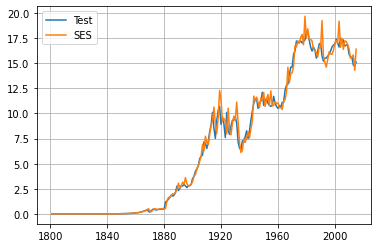

In [ ]:
data['Forecast']=np.exp(HoltsWinter_pred)



plt.plot(data['CO2'], label='Test')
plt.plot(data['Forecast'], label='SES')
plt.legend(loc='best')
plt.grid()
plt.show()

### Predicting CO2 values for next 10 years

In [ ]:
np.exp(HoltsWinter_final.forecast(10))

2015-12-31    14.976196
2016-12-31    14.791359
2017-12-31    13.854450
2018-12-31    13.587939
2019-12-31    13.803818
2020-12-31    13.701055
2021-12-31    13.266105
2022-12-31    12.820555
2023-12-31    12.722416
2024-12-31    12.788108
Freq: A-DEC, dtype: float64

In [ ]:
import pickle
filename = 'C:/Users/piyus/Downloads/air_quality_forecast.sav'
pickle.dump(HoltsWinter_final, open(filename, 'wb'))

In [ ]:
# .pickle file
with open('C:/Users/piyus/Downloads/air_quality_forecasts.pickle','wb') as f:
    pickle.dump(HoltsWinter_final,f)

In [ ]:
final_df = data.CO2
#For Deployment
final_df.to_pickle("C:/Users/piyus/Downloads/air_final_df.pickle")
final_df.to_csv("C:/Users/piyus/Downloads/CO2_Cleaned_data.csv")